Nama : Raafi Nur Adzani   
NIM : A11.2021.13536   
Kelas : A11.4404

# Predicting the Cost of Living Index ASEAN countries

# Data Description

### Ikhtisar Indeks Bagian Biaya Hidup   
Indeks biaya hidup yang disediakan pada dataset ini merujuk terhadap biaya hidup di Kota New York, dengan indeks dasar 100%. Berikut adalah rincian dari setiap indeks dan artinya:
1. **Cost of Living Index (Excl. Rent):** Indeks ini menunjukkan harga relatif barang konsumsi seperti bahan makanan, restoran, transportasi, dan utilitas. Ini tidak termasuk biaya akomodasi seperti sewa atau hipotek. Misalnya, kota dengan Indeks Biaya Hidup 120 diperkirakan 20% lebih mahal daripada Kota New York.
2. **Rent Index:** Indeks ini memperkirakan harga sewa apartemen di kota dibandingkan dengan Kota New York. Jika Indeks Sewa adalah 80, ini menunjukkan bahwa harga sewa rata-rata di kota itu kira-kira 20% lebih rendah daripada di Kota New York.
3. **Groceries Index:** Indeks ini memberikan perkiraan harga bahan makanan di kota relatif terhadap Kota New York. Numbeo menggunakan bobot item dari bagian "Markets" untuk menghitung indeks ini untuk setiap kota.
4. **Restaurants Index:** Indeks ini membandingkan harga makanan dan minuman di restoran dan bar dengan yang ada di Kota New York.
5. **Cost of Living Plus Rent Index:** Indeks ini memperkirakan harga barang konsumsi, termasuk sewa, dibandingkan dengan Kota New York.
6. **Local Purchasing Power:** Indeks ini menunjukkan daya beli relatif di kota tertentu berdasarkan gaji bersih rata-rata. Daya beli domestik sebesar 40 berarti penduduk dengan gaji rata-rata mampu membeli barang dan jasa rata-rata 60% lebih rendah dibandingkan dengan penduduk Kota New York dengan gaji rata-rata.

Source : https://www.kaggle.com/datasets/ankanhore545/cost-of-living-index-2022

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

1. pandas (import pandas as pd): Pandas adalah library Python yang digunakan untuk melakukan manipulasi dan analisis data. Pandas menyediakan struktur data yang efisien seperti DataFrame dan Series, yang memungkinkan pengguna untuk melakukan operasi seperti penggabungan, pemfilteran, dan transformasi data dengan mudah.

2. matplotlib.pyplot (import matplotlib.pyplot as plt): Matplotlib adalah library Python yang digunakan untuk membuat visualisasi data, seperti grafik dan plot. matplotlib.pyplot merupakan modul dari Matplotlib yang menyediakan berbagai fungsi untuk menggambar plot dan grafik dengan berbagai jenis.

3. seaborn (import seaborn as sns): Seaborn adalah library Python yang berfungsi untuk membuat visualisasi data yang lebih menarik dan informatif. Seaborn bekerja di atas Matplotlib dan menyediakan berbagai fitur tambahan untuk membuat plot statistik yang lebih mudah dan cepat.

4. sklearn.neighbors.KNeighborsRegressor: Ini adalah modul dari scikit-learn (sklearn) yang berisi implementasi algoritma K-Nearest Neighbors (KNN) untuk tugas regresi. KNN adalah algoritma pembelajaran mesin yang digunakan untuk memprediksi nilai berdasarkan nilai tetangga terdekat dari data latih.

5. sklearn.linear_model.LinearRegression: Ini adalah modul dari scikit-learn (sklearn) yang berisi implementasi algoritma regresi linier. Regresi linier digunakan untuk memodelkan hubungan linier antara variabel independen dan variabel dependen.

6. sklearn.model_selection.train_test_split: Ini adalah modul dari scikit-learn (sklearn) yang digunakan untuk membagi data menjadi data pelatihan (train) dan data uji (test). Pemisahan ini berguna untuk melatih model pada data pelatihan dan menguji performa model pada data uji yang belum pernah dilihat sebelumnya.

7. sklearn.metrics.mean_squared_error: Ini adalah modul dari scikit-learn (sklearn) yang berisi fungsi untuk menghitung mean squared error (MSE), yaitu metrik yang mengukur seberapa dekat prediksi model dengan nilai sebenarnya.

8. sklearn.metrics.mean_absolute_error: Ini adalah modul dari scikit-learn (sklearn) yang berisi fungsi untuk menghitung mean absolute error (MAE), yaitu metrik yang mengukur rata-rata kesalahan absolut antara prediksi model dan nilai sebenarnya.

9. sklearn.metrics.r2_score: Ini adalah modul dari scikit-learn (sklearn) yang berisi fungsi untuk menghitung R-squared score (R2 Score), yaitu metrik yang mengukur sejauh mana variasi dari nilai target dapat dijelaskan oleh model.

10. sklearn.ensemble.RandomForestRegressor: Ini adalah modul dari scikit-learn (sklearn) yang berisi implementasi algoritma Random Forest untuk tugas regresi. Random Forest adalah metode ensemble yang menggabungkan beberapa pohon keputusan (decision trees) untuk meningkatkan performa dan stabilitas model.

# Data Loading

In [2]:
#Memuat dataset
df = pd.read_csv("Cost_of_Living_Index_2022.csv")

In [3]:
# Mengatur opsi tampilan pandas untuk menampilkan seluruh baris dalam dataframe (df)
pd.set_option("display.max.row", None)

# Menampilkan dataframe (df)
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63
6,7,Austria,71.04,27.13,50.46,65.88,66.03,77.25
7,8,Azerbaijan,29.73,7.86,19.48,26.57,26.73,27.26
8,9,Bahamas,84.00,35.34,61.19,70.59,89.09,45.07
9,10,Bahrain,54.77,29.22,42.79,44.59,48.94,61.41


# Data Cleansing

In [4]:
#Memeriksa apakah ada data yang tidak memiliki value
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

# Preprocessing

In [5]:
#Menyeleksi Negara yang hanya ada di wilayah ASEAN
df_baru = df.iloc[[1,9,10,21,25,49,52,53,55,56,57,61,63,64,67,69,74,80,83,84,92,93,97,101,103,105,109,120,121,123,126,129,133,135,136,],:]

In [6]:
#Menampilkan data frame baru setelah diseleksi
df_baru

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
9,10,Bahrain,54.77,29.22,42.79,44.59,48.94,61.41
10,11,Bangladesh,33.13,4.42,19.67,30.41,21.70,25.30
21,22,Cambodia,49.11,15.68,33.44,50.61,22.90,13.32
25,26,China,41.77,16.53,29.93,46.01,28.37,59.99
49,50,Hong Kong,80.71,74.57,77.83,84.72,58.58,65.74
52,53,India,24.43,5.30,15.47,26.43,17.56,49.72
53,54,Indonesia,35.85,9.82,23.65,38.29,17.74,21.07
55,56,Iraq,34.47,10.63,23.29,30.46,28.31,40.92
56,57,Ireland,76.05,42.08,60.13,62.10,80.40,82.27


# Exploring Data Analyst

<Figure size 2000x2300 with 0 Axes>

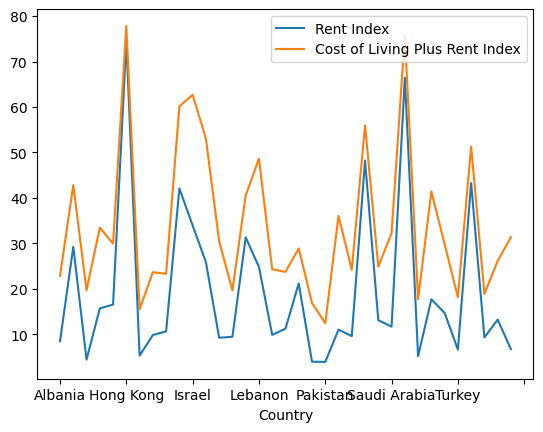

In [7]:
# Mengatur ukuran gambar plot menjadi (20, 23)
plt.figure(figsize=(20, 23))

# Mengelompokkan data dalam dataframe 'df_baru' berdasarkan kolom "Country",
# dan kemudian mengambil rata-rata dari kolom "Rent Index" dan "Cost of Living Plus Rent Index"
# untuk setiap kelompok negara
data_grouped = df_baru.groupby("Country")[["Rent Index", "Cost of Living Plus Rent Index"]].mean()

# Membuat plot berdasarkan data yang telah dikelompokkan dan dihitung rata-ratanya
# Plot ini akan menampilkan garis-garis yang menghubungkan titik-titik rata-rata pada setiap kelompok negara
data_grouped.plot()

# Menampilkan gambar plot
plt.show()


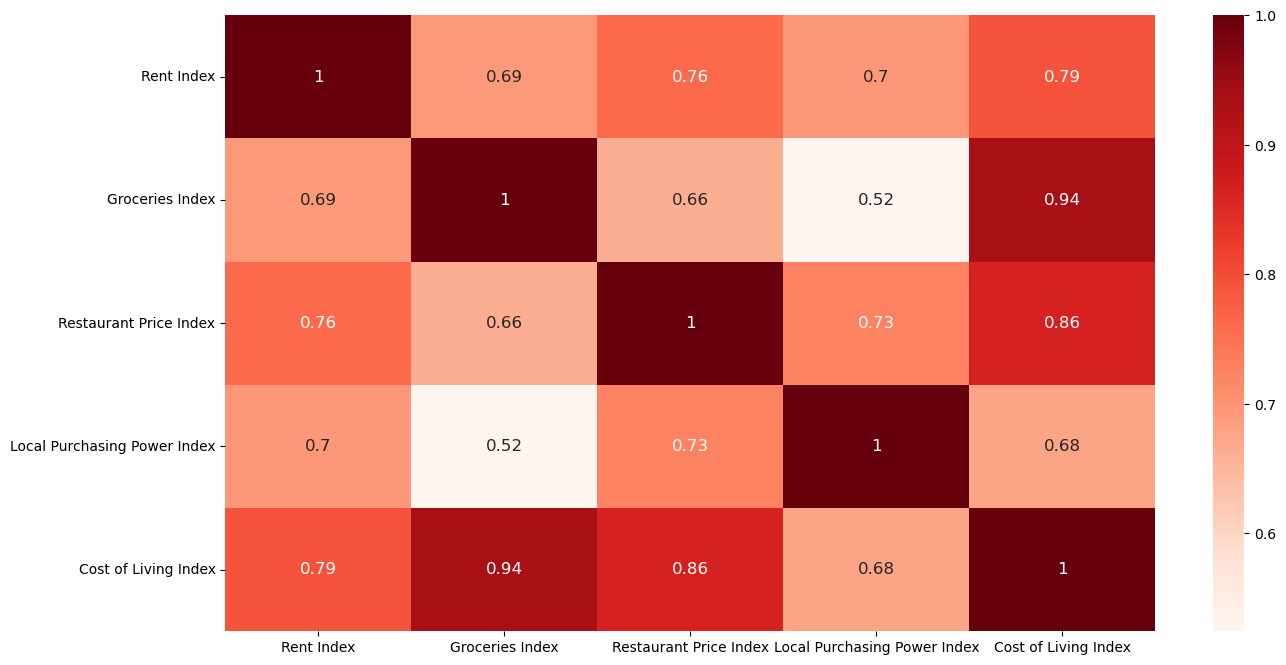

In [8]:
# Menghitung matriks korelasi antar kolom pada DataFrame 'df'
m = df_baru[["Rent Index", "Groceries Index", "Restaurant Price Index", "Local Purchasing Power Index", "Cost of Living Index"]]
matriksCorr = m.corr()

# Membuat gambar plot dengan ukuran (figsize) 15x8
plt.figure(figsize=(15, 8))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(matriksCorr, cmap='Reds', annot=True, annot_kws={'fontsize': 12})

# Menampilkan gambar plot
plt.show()

C:\Users\asd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asd\anaconda3\lib\s

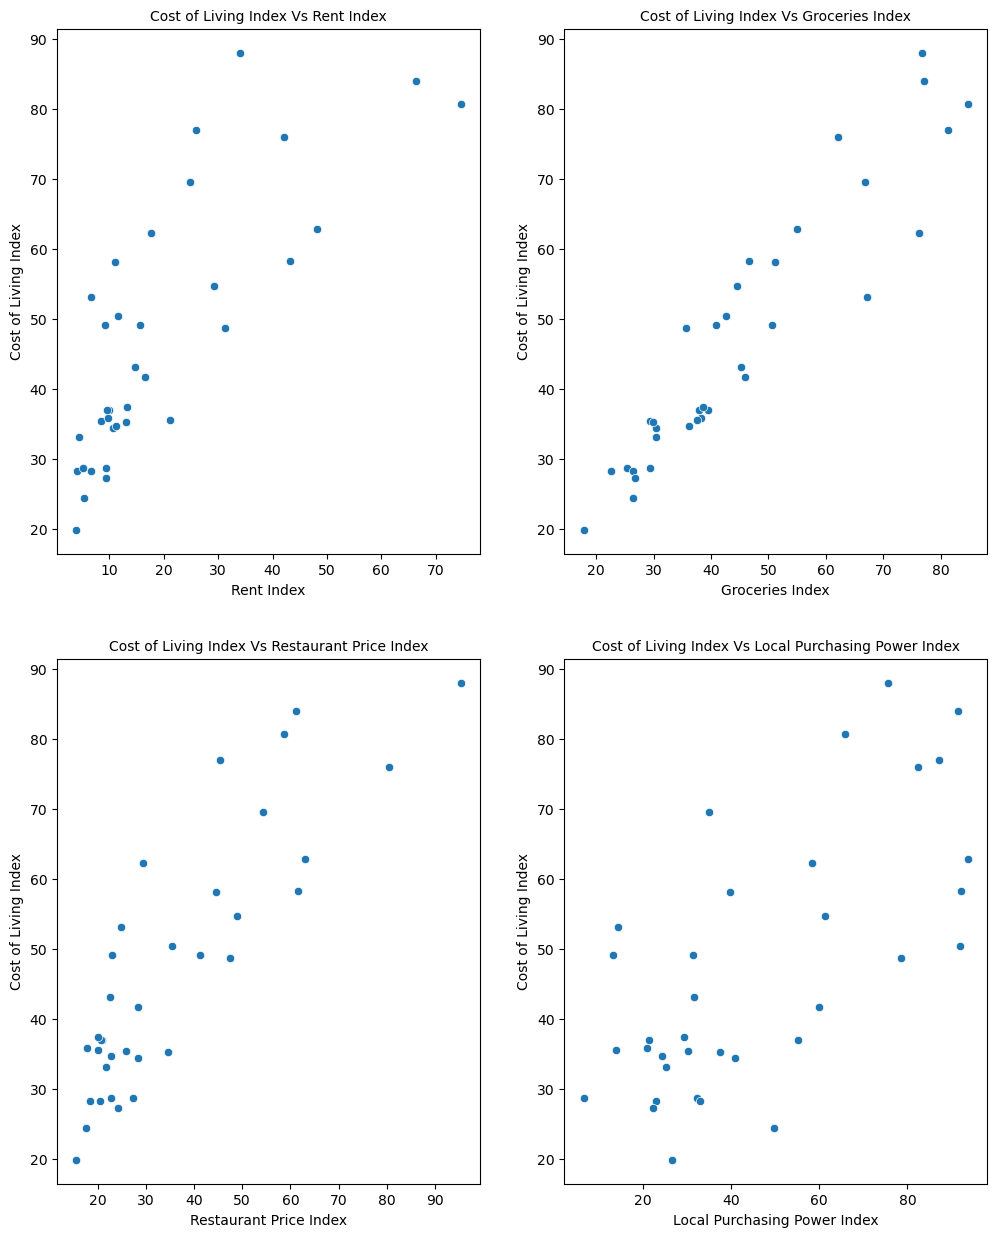

In [9]:
# Mengatur ukuran default gambar plot menjadi (12, 15)
plt.rcParams['figure.figsize'] = (12, 15)

# Membuat subplot pertama dengan posisi 2 baris dan 2 kolom, dan indeks 1
plt.subplot(2, 2, 1)
# Membuat scatter plot menggunakan kolom 'Rent Index' dan 'Cost of Living Index' dari DataFrame 'm'
sns.scatterplot(m['Rent Index'], m['Cost of Living Index'])
plt.title('Cost of Living Index Vs Rent Index', fontsize=10)
plt.xlabel('Rent Index')
plt.ylabel('Cost of Living Index')

# Membuat subplot kedua dengan posisi 2 baris dan 2 kolom, dan indeks 2
plt.subplot(2, 2, 2)
# Membuat scatter plot menggunakan kolom 'Groceries Index' dan 'Cost of Living Index' dari DataFrame 'm'
sns.scatterplot(m['Groceries Index'], m['Cost of Living Index'])
plt.title('Cost of Living Index Vs Groceries Index', fontsize=10)
plt.xlabel('Groceries Index')
plt.ylabel('Cost of Living Index')

# Membuat subplot ketiga dengan posisi 2 baris dan 2 kolom, dan indeks 3
plt.subplot(2, 2, 3)
# Membuat scatter plot menggunakan kolom 'Restaurant Price Index' dan 'Cost of Living Index' dari DataFrame 'm'
sns.scatterplot(m['Restaurant Price Index'], m['Cost of Living Index'])
plt.title('Cost of Living Index Vs Restaurant Price Index', fontsize=10)
plt.xlabel('Restaurant Price Index')
plt.ylabel('Cost of Living Index')

# Membuat subplot keempat dengan posisi 2 baris dan 2 kolom, dan indeks 4
plt.subplot(2, 2, 4)
# Membuat scatter plot menggunakan kolom 'Local Purchasing Power Index' dan 'Cost of Living Index' dari DataFrame 'm'
sns.scatterplot(m['Local Purchasing Power Index'], m['Cost of Living Index'])
plt.title('Cost of Living Index Vs Local Purchasing Power Index', fontsize=10)
plt.xlabel('Local Purchasing Power Index')
plt.ylabel('Cost of Living Index')

# Menampilkan gambar plot yang berisi keempat scatter plot di atas dalam satu gambar
plt.show()

In [10]:
#Menghilangkan atribut yang tidak diperlukan
df_baru.drop(["Rank", "Country", "Cost of Living Plus Rent Index"],axis=1, inplace=True)

C:\Users\asd\AppData\Local\Temp\ipykernel_12052\1850035582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru.drop(["Rank", "Country", "Cost of Living Plus Rent Index"],axis=1, inplace=True)


# Model Definition

In [11]:
#Definisikan model yang akan diuji coba hasil prediksinya
model_KNN = KNeighborsRegressor()
model_LR = LinearRegression()
model_RF = RandomForestRegressor()

# Selection Feature

In [12]:
#Bagi data dan masukkan ke dalam variable  X dan Y
X = df_baru.drop(["Cost of Living Index"], axis=1)
Y = df_baru["Cost of Living Index"]

# Spliting Data

In [13]:
#Bagi dua kelompok dari masing-masing variable menjadi data latih dan data pengujian
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Modeling dan Evaluasi Model

### Regresi Linear

In [14]:
# Melatih model regresi linier (Linear Regression) dengan data pelatihan
model_LR.fit(X_train, Y_train)

# Melakukan prediksi menggunakan data uji (X_test)
Y_pred = model_LR.predict(X_test)

# Mencetak Root Mean Squared Error (RMSE) untuk mengevaluasi performa model
# RMSE mengukur seberapa dekat prediksi model dengan nilai sebenarnya pada data uji (Y_test)
print(f'RMSE: {mean_squared_error(Y_test, Y_pred)}')

# Mencetak Mean Absolute Error (MAE) untuk mengevaluasi performa model
# MAE mengukur rata-rata kesalahan absolut antara prediksi model dan nilai sebenarnya pada data uji (Y_test)
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')

# Mencetak R-squared Score (R2 Score) untuk mengevaluasi performa model
# R2 Score mengukur sejauh mana variasi dari nilai target dapat dijelaskan oleh model
# Nilai R2 Score berkisar antara 0 hingga 1, dan semakin mendekati 1, semakin baik performa model
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')

RMSE: 10.224863031341574
MAE: 2.7143343063223306
R2 Score: 0.9743777650784909


### KNN

In [15]:
# Melatih model K-Nearest Neighbors (KNN) dengan data pelatihan
model_KNN.fit(X_train, Y_train)

# Melakukan prediksi menggunakan data uji (X_test)
Y_pred = model_KNN.predict(X_test)

# Mencetak Root Mean Squared Error (RMSE) untuk mengevaluasi performa model
# RMSE mengukur seberapa dekat prediksi model dengan nilai sebenarnya pada data uji (Y_test)
print(f'RMSE: {mean_squared_error(Y_test, Y_pred)}')

# Mencetak Mean Absolute Error (MAE) untuk mengevaluasi performa model
# MAE mengukur rata-rata kesalahan absolut antara prediksi model dan nilai sebenarnya pada data uji (Y_test)
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')

# Mencetak R-squared Score (R2 Score) untuk mengevaluasi performa model
# R2 Score mengukur sejauh mana variasi dari nilai target dapat dijelaskan oleh model
# Nilai R2 Score berkisar antara 0 hingga 1, dan semakin mendekati 1, semakin baik performa model
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')

RMSE: 107.44774742857155
MAE: 8.378857142857147
R2 Score: 0.7307493099943645


### Random Forest

In [16]:
# Melatih model Random Forest (RF) dengan data pelatihan
model_RF.fit(X_train, Y_train)

# Melakukan prediksi menggunakan data uji (X_test)
Y_pred = model_RF.predict(X_test)

# Mencetak Root Mean Squared Error (RMSE) untuk mengevaluasi performa model
# RMSE mengukur seberapa dekat prediksi model dengan nilai sebenarnya pada data uji (Y_test)
print(f'RMSE: {mean_squared_error(Y_test, Y_pred)}')

# Mencetak Mean Absolute Error (MAE) untuk mengevaluasi performa model
# MAE mengukur rata-rata kesalahan absolut antara prediksi model dan nilai sebenarnya pada data uji (Y_test)
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')

# Mencetak R-squared Score (R2 Score) untuk mengevaluasi performa model
# R2 Score mengukur sejauh mana variasi dari nilai target dapat dijelaskan oleh model
# Nilai R2 Score berkisar antara 0 hingga 1, dan semakin mendekati 1, semakin baik performa model
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')


RMSE: 24.76232796142835
MAE: 4.113099999999977
R2 Score: 0.9379486862282278


Dari masing-masing model, didapatkan untuk model dengan menggunakan Linear Regresi menjadi skor prediksi tertinggi. Sehingga model untuk dilakukan deployment adalah model dari Linear Regresi 

# Mengimpor Model

In [17]:
import pickle  # Mengimpor library pickle untuk serialisasi objek
pickle.dump(model_LR, open('model.pkl', 'wb'))  # Menyimpan objek model_LR ke dalam file 'model.pkl'